The dataset used in this notebook is based on Titanic challenge on Kaggle in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat

https://www.kaggle.com/c/titanic

###### This is my first attempt at applying my ML skills on a new data set apart from taking courses and implementing course projects.
###### The aim of this project is to create an end to end pipeline for Machine Learning based pediction. And in the process, learn to use different open sourced tools.


<font color='Black'>
Exploratory data analysis:

The approach I'm using to underastand the data is as follows:
- Data extraction : Load the dataset and have a first look at it.
- Cleaning : Fill in missing values.
- Plotting : Create some charts that'll (hopefully) spot correlations and hidden insights out of the data.

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier



In [2]:
## Acquire data using pandas
train_data = pd.read_csv(r".\data\train.csv")
test_data = pd.read_csv(r".\data\test.csv")
print(train_data.shape)
train_data

(891, 12)


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

Analyze data by plotting feature correlation vs "Survived" and understand how each feature/column is correlated to our output "Suvived".

Delete the columns which are not related to survival of a passenger.

Some of the columns have missing data. There are different ways to fill in the data for such fields. Here, I used median of age to fill in for missing Age and Fare values


In [3]:
## Fill NaN values in Age feature with median Age
medianAge = train_data['Age'].median()
train_data["Age"].fillna(medianAge, inplace=True)


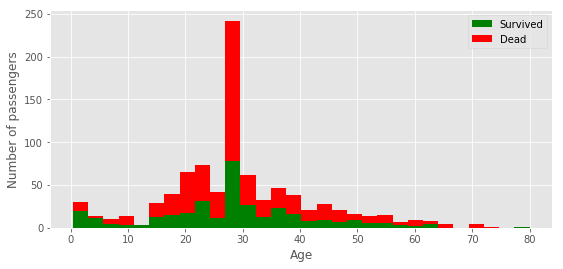

In [4]:
## plot survival vs Age
figure = plt.figure(figsize=(9,4))
plt.hist([train_data[train_data['Survived']==1]["Age"], train_data[train_data['Survived']==0]["Age"]], stacked=True, color=['g','r'], bins=30, label=['Survived', 'Dead'])
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.legend()

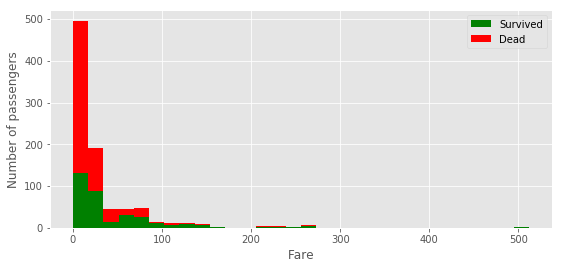

In [5]:
## plot survival vs Fare
figure = plt.figure(figsize=(9,4))
plt.hist([train_data[train_data['Survived']==1]['Fare'],train_data[train_data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

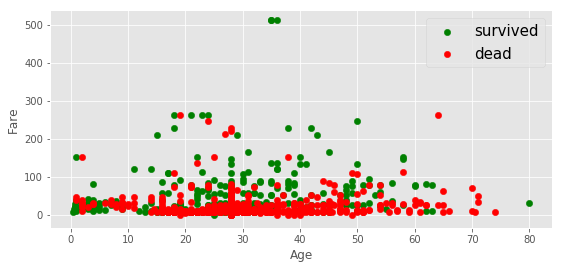

In [6]:
## plot survival vs Age and Fare

plt.figure(figsize=(9,4))
ax = plt.subplot()
ax.scatter(train_data[train_data['Survived']==1]['Age'],train_data[train_data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train_data[train_data['Survived']==0]['Age'],train_data[train_data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

Combining training set and test set together is a useful technique especially when our test set appears to have a feature that doesn't exist in the training set. 

In [7]:
## Method to combine train and test data
def get_combined_data():
    train = pd.read_csv(r'.\data\train.csv')
    test = pd.read_csv(r'.\data\test.csv')
    
    # extracting "Survived" feature and then removing it from the training data 
    targets = train.Survived
    train.drop('Survived', axis=1, inplace=True)
    
    # merging it with test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined

In [8]:
combined = get_combined_data()
combined.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [9]:
def get_titles(df):

        # we extract the title from each name
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    df['Title'] = df.Title.map(Title_Dictionary)
    return df

In [10]:
combined = get_titles(combined)
combined.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked Title  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S    Mr  
1  female  38.0      1      0          PC 17599  71.2833   C85        C   Mrs  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3  female  35.0      1      0            113803  53.1000  C123        S   Mrs  
4    male  35.0      0      0            373450   8.0500   NaN        S    Mr

## Utility functions for feature engineering some of the features

Feature Engineering:
- Feature Selection
- Feature transformation
- Feature creation

In [11]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)

def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)

def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

def process_cabin():
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)

def process_family():
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

In [12]:
process_embarked()
process_names()
process_family()
process_cabin()
process_family()
combined.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    male  22.0      1      0         A/5 21171   7.2500   
1            2       1  female  38.0      1      0          PC 17599  71.2833   
2            3       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1  female  35.0      1      0            113803  53.1000   
4            5       3    male  35.0      0      0            373450   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  Title_Master  Title_Miss  Title_Mr  \
0           0           0           1             0           0         1   
1           1           0           0             0           0         0   
2           0           0           1             0           1         0   
3           0           0           1             0           0         0   
4           0           0           1             0           0         1   

   Title_Mrs  Title_Officer  Title_Royalty  FamilySize  Singleton  \
0          0              0              0           2          0   
1          1              0              0           2          0   
2          0              0              0           1          1   
3          1              0              0           2          0   
4          0              0              0           1          1   

   SmallFamily  LargeFamily  Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0            1            0        0        0        0        0        0   
1            1            0        0        0        1        0        0   
2            0            0        0        0        0        0        0   
3            1            0        0        0        1        0        0   
4            0            0        0        0        0        0        0   

   Cabin_F  Cabin_G  Cabin_T  Cabin_U  
0        0        0        0        1  
1        0        0        0        0  
2        0        0        0        1  
3        0        0        0        0  
4        0        0        0        1

In [13]:
 # dropping columns that are not correlated to our output
combined.drop('Ticket', inplace=True, axis=1)
combined.drop('PassengerId', inplace=True, axis=1)
combined.drop('SibSp', inplace=True, axis=1)
combined.drop('Parch', inplace=True, axis=1)
combined.head()

Pclass     Sex   Age     Fare  Embarked_C  Embarked_Q  Embarked_S  \
0       3    male  22.0   7.2500           0           0           1   
1       1  female  38.0  71.2833           1           0           0   
2       3  female  26.0   7.9250           0           0           1   
3       1  female  35.0  53.1000           0           0           1   
4       3    male  35.0   8.0500           0           0           1   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Officer  \
0             0           0         1          0              0   
1             0           0         0          1              0   
2             0           1         0          0              0   
3             0           0         0          1              0   
4             0           0         1          0              0   

   Title_Royalty  FamilySize  Singleton  SmallFamily  LargeFamily  Cabin_A  \
0              0           2          0            1            0        0   
1              0           2          0            1            0        0   
2              0           1          1            0            0        0   
3              0           2          0            1            0        0   
4              0           1          1            0            0        0   

   Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  Cabin_U  
0        0        0        0        0        0        0        0        1  
1        0        1        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        1  
3        0        1        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        1

In [14]:
## filling missing values in column "Age" with median value
medianAge = combined["Age"].median()
combined["Age"].fillna(medianAge, inplace=True)

## filling missing values in column "Fare" with median value
medianFare = combined["Fare"].median()
combined["Fare"].fillna(medianFare, inplace=True)


In [15]:
## get dummy columns for "Sex", "Pclass"
temp = pd.get_dummies(combined["Sex"])
combined = pd.concat([combined, temp], axis=1)
combined.drop("Sex", inplace=True, axis=1)

temp = pd.get_dummies(combined["Pclass"], prefix='Pclass')
combined = pd.concat([combined, temp], axis=1)
combined.drop("Pclass", inplace=True, axis=1)

In [16]:
combined.head()

Age     Fare  Embarked_C  Embarked_Q  Embarked_S  Title_Master  \
0  22.0   7.2500           0           0           1             0   
1  38.0  71.2833           1           0           0             0   
2  26.0   7.9250           0           0           1             0   
3  35.0  53.1000           0           0           1             0   
4  35.0   8.0500           0           0           1             0   

   Title_Miss  Title_Mr  Title_Mrs  Title_Officer  Title_Royalty  FamilySize  \
0           0         1          0              0              0           2   
1           0         0          1              0              0           2   
2           1         0          0              0              0           1   
3           0         0          1              0              0           2   
4           0         1          0              0              0           1   

   Singleton  SmallFamily  LargeFamily  Cabin_A  Cabin_B  Cabin_C  Cabin_D  \
0          0            1            0        0        0        0        0   
1          0            1            0        0        0        1        0   
2          1            0            0        0        0        0        0   
3          0            1            0        0        0        1        0   
4          1            0            0        0        0        0        0   

   Cabin_E  Cabin_F  Cabin_G  Cabin_T  Cabin_U  female  male  Pclass_1  \
0        0        0        0        0        1       0     1         0   
1        0        0        0        0        0       1     0         1   
2        0        0        0        0        1       1     0         0   
3        0        0        0        0        0       1     0         1   
4        0        0        0        0        1       0     1         0   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1

In [17]:
## Seperating Combined data to training and test data
finalTrain = combined.head(891)
finalTest = combined.iloc[891:]
targets = train_data["Survived"]

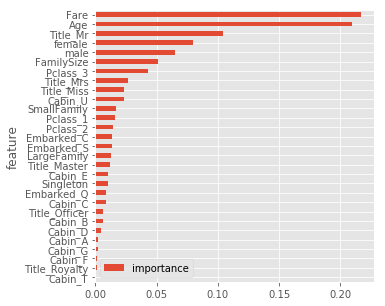

In [18]:
## trying to understand how features are correalated to the output "Survived"

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(finalTrain, targets)

features = pd.DataFrame()
features['feature'] = finalTrain.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(5, 5))

In [19]:
## converting pandas dataframe to numpy matrix
X = finalTrain.as_matrix().T
Y = train_data["Survived"]
Y = Y.as_matrix().reshape(1, 891)


In [20]:
## slicing X(actual train data) and Y(actually train data) in to 
## train(90%) and cross validation sets(10%) for evaluate models later

X_train = X[:, 0:int(0.9*X.shape[1])]
Y_train = Y[:, 0:int(0.9*X.shape[1])]

X_cv = X[:, int(0.9*X.shape[1]):]
Y_cv = Y[:, int(0.9*X.shape[1]):]
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)

(29, 801)
(1, 801)
(29, 90)
(1, 90)


## Utility functions for Logistic regression model that are used later.

In [21]:
#### utility functions for Logistic regression modelled later.

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def initialize_with_zeros_lr(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    """
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

## Propagate -- returns cost and gradients
def propagate(w, b, X, Y, lambd = 0):
    """
    Implement the cost function and its gradient for the propagation explained above
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)  # compute activation
    cost =  (-1/m)*(np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log(1-A).T))  # compute cost
    ### END CODE HERE ###
    
    if lambd is not 0:
        L2_regularization_cost = (lambd/(2*m))*(np.sum(np.square(w)))
        cost = cost + L2_regularization_cost
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)*np.dot(X, (A-Y).T) ## meaning dJ/dw
    db = (1/m)*np.sum(A-Y) ## meaning dJ/db
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# optimize using gradient descent

def optimize_gradient_descent(w, b, X, Y, lambd, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    """
    
    costs = []
    m = X.shape[1]
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y, lambd)
                
        # Retrieve derivatives from grads
        dw = grads["dw"] ## meaning dJ/dw
        db = grads["db"] ## meaning dJ/db
        
        ### START CODE HERE ###
        w = w-learning_rate*dw + (lambd/m)*w
        b = b-learning_rate*db
                
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 5000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


# predict
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)
    
    ### Alternate code
    Y_prediction = A
    Y_prediction[Y_prediction>0.5] =1
    Y_prediction[Y_prediction<=0.5] =0
        
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #Y_prediction[0][i] = 1 if A[0][i]>0.5 else 0
        pass
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

# Plot learning curve (with costs)
def plot_learning_curve(costs, learning_rate):
    costs = np.squeeze(costs)
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [22]:
# model for logistic Regression

def model_logistic_regression(X_train, Y_train, X_test, Y_test, lambd = 0.001, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function that I've implemented previously
    """
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros_lr(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize_gradient_descent(w, b, X_train, Y_train, lambd, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [23]:
d = model_logistic_regression(X_train, Y_train, X_cv, Y_cv, lambd=0.001, num_iterations = 50000, learning_rate = 0.002, print_cost = True)


Cost after iteration 0: 0.693147
Cost after iteration 5000: 0.454513
Cost after iteration 10000: 0.434931
Cost after iteration 15000: 0.426527
Cost after iteration 20000: 0.421228
Cost after iteration 25000: 0.417510
Cost after iteration 30000: 0.414761
Cost after iteration 35000: 0.412655
Cost after iteration 40000: 0.410995
Cost after iteration 45000: 0.409656
train accuracy: 82.39700374531836 %
test accuracy: 85.55555555555556 %


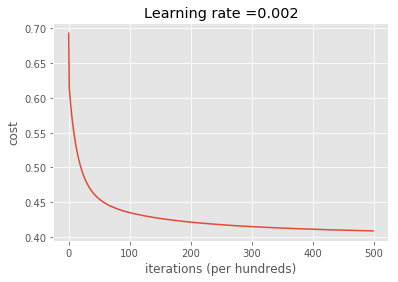

In [24]:
plot_learning_curve(d['costs'], d["learning_rate"])

In [25]:
# Logistic Regression using sklearn
logreg = LogisticRegression()
logreg.fit(X_train.T, Y_train.T)
Y_cv_pred = logreg.predict(X_cv.T)
acc_log1 = round(logreg.score(X_train.T, Y_train.T) * 100, 2)
acc_log2 = round(logreg.score(X_cv.T, Y_cv.T) * 100, 2)
print("Training Accuracy for LR using sklearn: ", acc_log1)
print("Cross validation Accuracy for LR using sklearn: ", acc_log2)

Training Accuracy for LR using sklearn:  83.77
Cross validation Accuracy for LR using sklearn:  85.56


In [26]:
# Support Vector Machines using sklearn
svc = SVC()
svc.fit(X_train.T, Y_train.T)
Y_cv_pred = svc.predict(X_cv.T)
acc_svc1 = round(svc.score(X_train.T, Y_train.T) * 100, 2)
acc_svc2 = round(svc.score(X_cv.T, Y_cv.T) * 100, 2)
print("Training Accuracy for SVM using sklearn: ", acc_svc1)
print("Cross validation Accuracy for SVM using sklearn: ", acc_svc2)

Training Accuracy for SVM using sklearn:  85.64
Cross validation Accuracy for SVM using sklearn:  83.33


In [27]:
# KNN using sklearn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train.T, Y_train.T)
Y_cv_pred = knn.predict(X_cv.T)
acc_knn1 = round(knn.score(X_train.T, Y_train.T) * 100, 2)
acc_knn2 = round(knn.score(X_cv.T, Y_cv.T) * 100, 2)
print("Training Accuracy for KNN using sklearn: ", acc_knn1)
print("Cross validation Accuracy for KNN using sklearn: ", acc_knn2)

Training Accuracy for KNN using sklearn:  83.27
Cross validation Accuracy for KNN using sklearn:  76.67


#### Conclusion
Though I tried very few Machine Learning models, I think there is scope for improvement. 
Some of the ways I think that wil help improve prediction is 
- Better feature engineering
- Hyperparameter selection
- Ofcourse, trying better ML models like Neural networks, Gradient Boost(which I have no idea)
